## Create Web type ArcGIS Cloud Storage (ACS) connection files for NASA Earthdata STAC

### You will need a NASA Earthdata account to use this code. You can create a free account at https://www.earthdata.nasa.gov/data/earthdata-login
##### This notebook creates ACS connections using "Web" Service Provider option. Support for NASA Earthdata using Web provider requires ArcGIS Pro minumum version of 3.5.2. Using Web provider will produce https:// protocol links when used with a NASA Earthdata STAC connection in ArcGIS Pro. Therefore, any ArcGIS Pro machine will be able to access data. This ACS connection type is ideal for visualizing smaller datasets, running analysis on the fly and fine-tuning analysis methods.
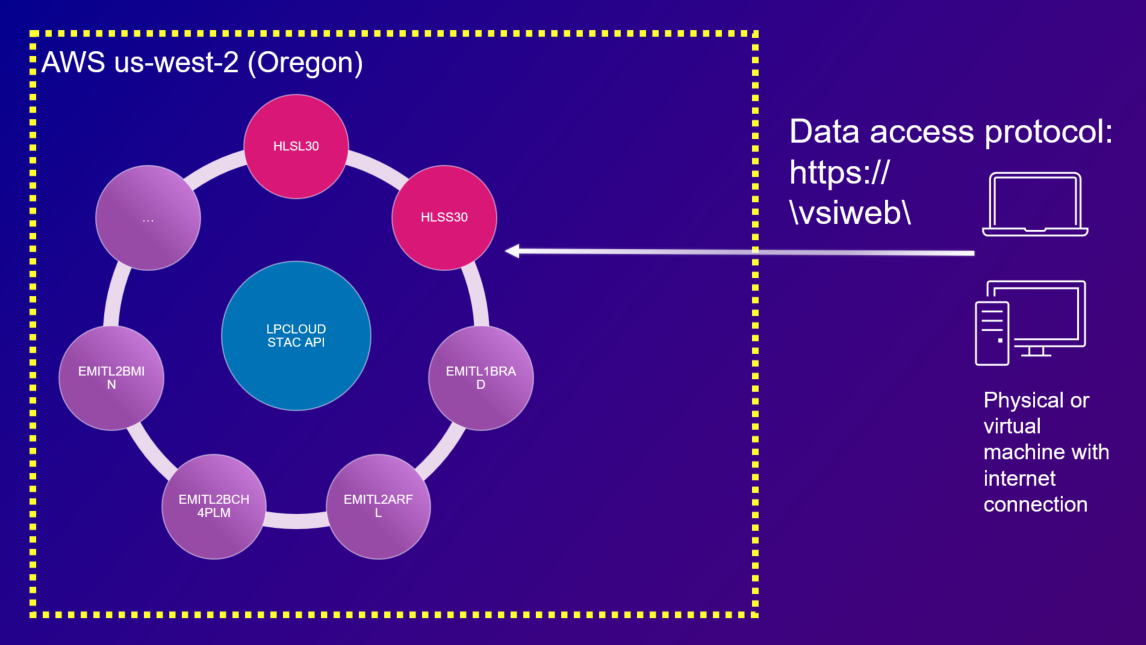
##### For large-scale implementation it is best to use the "Amazon" Service Provider method (separate notebook in this repository) on a virtual machine in AWS us-west-2 (Oregon).

### Enter your NASA Earthdata credentials

In [ ]:
import getpass

earthdata_un = input("Enter your NASA Earthdata username: ")
earthdata_pw = getpass.getpass("Enter your NASA Earthdata password: ")

### Create a .netrc credentials file in the home directory (C:\users\USERNAME\\.netrc)

In [ ]:
from pathlib import Path

netrc_path = Path.home() / ".netrc"

lines = [
    f"machine urs.earthdata.nasa.gov",
    f"\tlogin {earthdata_un}",
    f"\tpassword {earthdata_pw}"
]

netrc_content = "\n".join(lines) + "\n"
netrc_path.write_text(netrc_content, encoding="utf-8", newline="\r\n")

# Generate posix paths
netrc_path_posix = netrc_path.as_posix()
netrc_cookies_path_posix = netrc_path_posix.replace (".netrc", "cookies.txt")

## Create a directory for the ACS connection files

In [ ]:
user_path = input("Enter the directory for creating ACS connection files: e.g. C:\\acsfiles\\NASAEarthdata\\Web")

acs_folder_path = Path(user_path)
acs_folder_path.mkdir(parents=True, exist_ok=True)

## Function creates an ACS connection file supporting an entire NASA Earthdata Catalog

In [ ]:
import arcpy

def CreateAcsUsingWebProvider(acs_folder, acs_name, token_endpoint):
    arcpy.management.CreateCloudStorageConnectionFile(
        out_folder_path=acs_folder,
        out_name=acs_name,
        service_provider="WEB",
        bucket_name="",
        access_key_id="",
        secret_access_key='',
        region="",
        end_point=token_endpoint,
        config_options=f"GDAL_HTTP_NETRC YES;GDAL_HTTP_COOKIEFILE {netrc_cookies_path_posix};GDAL_HTTP_COOKIEJAR {netrc_cookies_path_posix};GDAL_HTTP_NETRC_FILE {netrc_path_posix};GDAL_DISABLE_READDIR_ON_OPEN EMPTY_DIR",
        folder="",
        authentication=""
    )

## Create an ACS connection file for each of the Earthdata Catalogs

In [ ]:
import os

catalogs = [("LPCLOUD", "https://data.lpdaac.earthdatacloud.nasa.gov"),
            ("LAADS", "https://data.laadsdaac.earthdatacloud.nasa.gov"),
            ("NSIDC_CPRD", "https://data.nsidc.earthdatacloud.nasa.gov"),
            ("OB_CLOUD", "https://obdaac-tea.earthdatacloud.nasa.gov"),
            ("POCLOUD", "https://archive.podaac.earthdata.nasa.gov"),
            ("ORNL_CLOUD", "https://data.ornldaac.earthdata.nasa.gov"),
            ("GHRC_DAAC", "https://data.ghrc.earthdata.nasa.gov"),
            ("ASF_sentinel1", "https://sentinel1.asf.alaska.edu"),
            ("ASF_cumulus", "https://cumulus.asf.alaska.edu"),
            ("LARC", "https://data.asdc.earthdata.nasa.gov"),
            ("LARC_CLOUD", "https://data.asdc.earthdata.nasa.gov"),
            ("CSDA", "https://data.csdap.earthdata.nasa.gov"),
            ("GES_DISC", "https://data.gesdisc.earthdata.nasa.gov")]

for catalog, uri in catalogs:
    try:
        out_path = os.path.join(acs_folder_path, catalog + ".acs")
        CreateAcsUsingWebProvider(str(acs_folder_path), catalog + ".acs", uri)
        print(f"Created ACS connection file {out_path}")
    except Exception as e:
        print(f"Error during ACS creation: {e}")